In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [2]:
data_dir = 'data/'

def read_text(file):
    with open(file, 'r') as f:
        text = f.readlines()
    for i in range(len(text)):
        text[i] = text[i].replace('\n', '')
    return text

palindromic_strings = read_text(data_dir + 'palindromic_strings.txt')
nonpalindromic_strings = read_text(data_dir + 'nonpalindromic_strings.txt')
palindromic_strings_off_by_one_swap = read_text(data_dir + 'palindromic_strings_off_by_one_swap.txt')
palindromic_strings_off_by_one_random_replacement = read_text(data_dir + 'palindromic_strings_off_by_one_random_replacement.txt') 

In [3]:
challenge_dataset = palindromic_strings[-3000:] + nonpalindromic_strings[-1000:] + palindromic_strings_off_by_one_swap[-1000:] + palindromic_strings_off_by_one_random_replacement[-1000:]
challenge_labels = [0] * 3000 + [1] * 1000 + [1] * 1000 + [1] * 1000
challenge_finegrained_labels = {}
for i in range(3000):
    challenge_finegrained_labels[palindromic_strings[-3000:][i]] = 0
for i in range(1000):
    challenge_finegrained_labels[nonpalindromic_strings[-1000:][i]] = 1
    challenge_finegrained_labels[palindromic_strings_off_by_one_swap[-1000:][i]] = 2
    challenge_finegrained_labels[palindromic_strings_off_by_one_random_replacement[-1000:][i]] = 3

dataset = palindromic_strings[:30000] + nonpalindromic_strings[:10000] + palindromic_strings_off_by_one_swap[:10000] + palindromic_strings_off_by_one_random_replacement[:10000]
labels = [0] * 30000 + [1] * 10000 + [1] * 10000 + [1] * 10000
finegrained_labels = {}
for i in range(30000):
    finegrained_labels[palindromic_strings[:30000][i]] = 0
for i in range(10000):
    finegrained_labels[nonpalindromic_strings[:10000][i]] = 1
    finegrained_labels[palindromic_strings_off_by_one_swap[:10000][i]] = 2
    finegrained_labels[palindromic_strings_off_by_one_random_replacement[:10000][i]] = 3
print(len(dataset), len(labels))
# train test split
train_dataset, test_dataset, train_labels, test_labels = train_test_split(dataset, labels, test_size=0.2, random_state=42, stratify=labels)

60000 60000


In [4]:
train_dataset_finegrained_labels = []
for i in train_dataset:
    train_dataset_finegrained_labels.append(finegrained_labels[i])
test_dataset_finegrained_labels = []
for i in test_dataset:
    test_dataset_finegrained_labels.append(finegrained_labels[i])
challenge_dataset_finegrained_labels = []
for i in challenge_dataset:
    challenge_dataset_finegrained_labels.append(challenge_finegrained_labels[i])

In [5]:
SEQ_LENGTH = 9
all_chars = string.ascii_uppercase

In [6]:
def printFormattedClassificationReport(classification_report):
    print("Accuracy: ", classification_report['accuracy'])
    print("Class 0 Precision: ", classification_report['0']['precision'])
    print("Class 0 Recall: ", classification_report['0']['recall'])
    print("Class 0 F1 Score: ", classification_report['0']['f1-score'])
    print("Class 1 Precision: ", classification_report['1']['precision'])
    print("Class 1 Recall: ", classification_report['1']['recall'])
    print("Class 1 F1 Score: ", classification_report['1']['f1-score'])
    print("Macro Average Precision: ", classification_report['macro avg']['precision'])
    print("Macro Average Recall: ", classification_report['macro avg']['recall'])
    print("Macro Average F1 Score: ", classification_report['macro avg']['f1-score'])
    print("Weighted Average Precision: ", classification_report['weighted avg']['precision'])
    print("Weighted Average Recall: ", classification_report['weighted avg']['recall'])
    print("Weighted Average F1 Score: ", classification_report['weighted avg']['f1-score'])

In [7]:
def printCorrectnessOverDifferentTypes(predictions, mode):
    if mode == 'test':
        labels = test_labels
        finegrained_labels = test_dataset_finegrained_labels
    elif mode == 'challenge':
        labels = challenge_labels
        finegrained_labels = challenge_dataset_finegrained_labels
    finegrained_label_correct = [0, 0, 0, 0]
    finegrained_label_total = [0, 0, 0, 0]
    for i in range(len(predictions)):
        finegrained_label_total[finegrained_labels[i]] += 1
        if predictions[i] == labels[i]:
            finegrained_label_correct[finegrained_labels[i]] += 1
    print("Accuracy for Palindromic Strings: ", finegrained_label_correct[0]/finegrained_label_total[0])
    print("Accuracy for Nonpalindromic Strings: ", finegrained_label_correct[1]/finegrained_label_total[1])
    print("Accuracy for Palindromic Strings Off By One Swap: ", finegrained_label_correct[2]/finegrained_label_total[2])
    print("Accuracy for Palindromic Strings Off By One Random Replacement: ", finegrained_label_correct[3]/finegrained_label_total[3])


# Encode Using Alphabet Arrays With Bools

In [8]:
def encode(seq):
    seq = seq.upper()
    assert len(seq) == SEQ_LENGTH, "length of sequence must be {}".format(SEQ_LENGTH)
    encoding = [0]*len(all_chars)
    for i, char in enumerate(seq):
        encoding[all_chars.index(char)] = 1
    return encoding

encoded_train_dataset = [encode(seq) for seq in train_dataset]
encoded_test_dataset = [encode(seq) for seq in test_dataset]
encoded_challenge_dataset = [encode(seq) for seq in challenge_dataset]

In [9]:
clf = MLPClassifier(hidden_layer_sizes=(10), random_state=42, max_iter=1000, verbose=True, early_stopping=True, validation_fraction=0.1)
clf.fit(encoded_train_dataset, train_labels)

Iteration 1, loss = 0.76238170
Validation score: 0.458750
Iteration 2, loss = 0.70749235
Validation score: 0.483542
Iteration 3, loss = 0.69321402
Validation score: 0.539583
Iteration 4, loss = 0.67897496
Validation score: 0.645625
Iteration 5, loss = 0.65684353
Validation score: 0.662500
Iteration 6, loss = 0.59936383
Validation score: 0.740000
Iteration 7, loss = 0.56444406
Validation score: 0.749167
Iteration 8, loss = 0.54764263
Validation score: 0.743750
Iteration 9, loss = 0.53941393
Validation score: 0.757292
Iteration 10, loss = 0.53502241
Validation score: 0.757083
Iteration 11, loss = 0.53273981
Validation score: 0.755417
Iteration 12, loss = 0.53130072
Validation score: 0.753542
Iteration 13, loss = 0.53059318
Validation score: 0.753542
Iteration 14, loss = 0.53014520
Validation score: 0.757708
Iteration 15, loss = 0.52983507
Validation score: 0.757083
Iteration 16, loss = 0.52965293
Validation score: 0.757292
Iteration 17, loss = 0.52939649
Validation score: 0.757500
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=10, max_iter=1000,
              random_state=42, verbose=True)

In [10]:
test_preds = clf.predict(encoded_test_dataset)
test_report = classification_report(test_labels, test_preds, output_dict=True)
printFormattedClassificationReport(test_report)
print('-'*50)
printCorrectnessOverDifferentTypes(test_preds, 'test')

Accuracy:  0.7565833333333334
Class 0 Precision:  0.6728027837018745
Class 0 Recall:  0.999
Class 0 F1 Score:  0.8040780736467905
Class 1 Precision:  0.9980588806211582
Class 1 Recall:  0.5141666666666667
Class 1 F1 Score:  0.6786932130678694
Macro Average Precision:  0.8354308321615164
Macro Average Recall:  0.7565833333333334
Macro Average F1 Score:  0.74138564335733
Weighted Average Precision:  0.8354308321615164
Weighted Average Recall:  0.7565833333333334
Weighted Average F1 Score:  0.7413856433573299
--------------------------------------------------
Accuracy for Palindromic Strings:  0.999
Accuracy for Nonpalindromic Strings:  0.9877862595419847
Accuracy for Palindromic Strings Off By One Swap:  0.0004930966469428008
Accuracy for Palindromic Strings Off By One Random Replacement:  0.5695067264573991


In [11]:
challenge_preds = clf.predict(encoded_challenge_dataset)
challenge_report = classification_report(challenge_labels, challenge_preds, output_dict=True)
printFormattedClassificationReport(challenge_report)
print('-'*50)
printCorrectnessOverDifferentTypes(challenge_preds, 'challenge')

Accuracy:  0.7611666666666667
Class 0 Precision:  0.6771422111688898
Class 0 Recall:  0.9983333333333333
Class 0 F1 Score:  0.8069513673716826
Class 1 Precision:  0.9968294229549778
Class 1 Recall:  0.524
Class 1 F1 Score:  0.686912824994538
Macro Average Precision:  0.8369858170619338
Macro Average Recall:  0.7611666666666667
Macro Average F1 Score:  0.7469320961831103
Weighted Average Precision:  0.8369858170619338
Weighted Average Recall:  0.7611666666666667
Weighted Average F1 Score:  0.7469320961831102
--------------------------------------------------
Accuracy for Palindromic Strings:  0.9983333333333333
Accuracy for Nonpalindromic Strings:  0.994
Accuracy for Palindromic Strings Off By One Swap:  0.0
Accuracy for Palindromic Strings Off By One Random Replacement:  0.578


# Encode Using Alphabet Arrays With Frequencies

In [12]:
def encode_with_freq(seq):
    seq = seq.upper()
    assert len(seq) == SEQ_LENGTH, "length of sequence must be {}".format(SEQ_LENGTH)
    encoding = [0]*len(all_chars)
    for i, char in enumerate(seq):
        encoding[all_chars.index(char)] += 1
    return encoding

encoded_with_freq_train_dataset = [encode_with_freq(seq) for seq in train_dataset]
encoded_with_freq_test_dataset = [encode_with_freq(seq) for seq in test_dataset]
encoded_with_freq_challenge_dataset = [encode_with_freq(seq) for seq in challenge_dataset]

In [13]:
clf_encoded_with_freq = MLPClassifier(hidden_layer_sizes=(100), random_state=42, max_iter=1000, verbose=True, early_stopping=True, validation_fraction=0.1)
clf_encoded_with_freq.fit(encoded_with_freq_train_dataset, train_labels)

Iteration 1, loss = 0.67857196
Validation score: 0.605625
Iteration 2, loss = 0.64835134
Validation score: 0.634792
Iteration 3, loss = 0.63466757
Validation score: 0.626875
Iteration 4, loss = 0.62580528
Validation score: 0.639792
Iteration 5, loss = 0.61850516
Validation score: 0.626250
Iteration 6, loss = 0.61225316
Validation score: 0.603333
Iteration 7, loss = 0.60611896
Validation score: 0.619167
Iteration 8, loss = 0.60036505
Validation score: 0.645208
Iteration 9, loss = 0.59436176
Validation score: 0.652708
Iteration 10, loss = 0.58868376
Validation score: 0.640208
Iteration 11, loss = 0.58323329
Validation score: 0.655208
Iteration 12, loss = 0.57731968
Validation score: 0.651875
Iteration 13, loss = 0.57213541
Validation score: 0.643333
Iteration 14, loss = 0.56752811
Validation score: 0.657500
Iteration 15, loss = 0.56354236
Validation score: 0.656250
Iteration 16, loss = 0.55861115
Validation score: 0.696042
Iteration 17, loss = 0.55474257
Validation score: 0.699375
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=100, max_iter=1000,
              random_state=42, verbose=True)

In [14]:
test_preds = clf_encoded_with_freq.predict(encoded_with_freq_test_dataset)
test_report = classification_report(test_labels, test_preds, output_dict=True)
printFormattedClassificationReport(test_report)
print('-'*50)
printCorrectnessOverDifferentTypes(test_preds, 'test')

Accuracy:  0.745
Class 0 Precision:  0.6918559122944401
Class 0 Recall:  0.8835
Class 0 F1 Score:  0.7760210803689064
Class 1 Precision:  0.838865836791148
Class 1 Recall:  0.6065
Class 1 F1 Score:  0.7040046430644225
Macro Average Precision:  0.765360874542794
Macro Average Recall:  0.745
Macro Average F1 Score:  0.7400128617166644
Weighted Average Precision:  0.765360874542794
Weighted Average Recall:  0.745
Weighted Average F1 Score:  0.7400128617166644
--------------------------------------------------
Accuracy for Palindromic Strings:  0.8835
Accuracy for Nonpalindromic Strings:  0.9928753180661578
Accuracy for Palindromic Strings Off By One Swap:  0.11094674556213018
Accuracy for Palindromic Strings Off By One Random Replacement:  0.7289486796213254


In [15]:
challenge_preds = clf_encoded_with_freq.predict(encoded_with_freq_challenge_dataset)
challenge_report = classification_report(challenge_labels, challenge_preds, output_dict=True)
printFormattedClassificationReport(challenge_report)
print('-'*50)
printCorrectnessOverDifferentTypes(challenge_preds, 'challenge')

Accuracy:  0.7466666666666667
Class 0 Precision:  0.693717277486911
Class 0 Recall:  0.8833333333333333
Class 0 F1 Score:  0.7771260997067448
Class 1 Precision:  0.8394495412844036
Class 1 Recall:  0.61
Class 1 F1 Score:  0.7065637065637066
Macro Average Precision:  0.7665834093856574
Macro Average Recall:  0.7466666666666666
Macro Average F1 Score:  0.7418449031352257
Weighted Average Precision:  0.7665834093856574
Weighted Average Recall:  0.7466666666666667
Weighted Average F1 Score:  0.7418449031352257
--------------------------------------------------
Accuracy for Palindromic Strings:  0.8833333333333333
Accuracy for Nonpalindromic Strings:  0.995
Accuracy for Palindromic Strings Off By One Swap:  0.111
Accuracy for Palindromic Strings Off By One Random Replacement:  0.724


# Encode as ASCII indices shifted to 0

In [16]:
def encode_with_ascii_shifted_to_zero(seq):
    seq = seq.upper()
    assert len(seq) == SEQ_LENGTH, "length of sequence must be {}".format(SEQ_LENGTH)
    encoding = [0]*SEQ_LENGTH
    for i, char in enumerate(seq):
        encoding[i] = ord(char) - ord('A')
    return encoding

encoded_with_ascii_shifted_to_zero_train_dataset = [encode_with_ascii_shifted_to_zero(seq) for seq in train_dataset]
encoded_with_ascii_shifted_to_zero_test_dataset = [encode_with_ascii_shifted_to_zero(seq) for seq in test_dataset]
encoded_with_ascii_shifted_to_zero_challenge_dataset = [encode_with_ascii_shifted_to_zero(seq) for seq in challenge_dataset]

In [44]:
mlp_encoded_with_ascii_shifted_to_zero = MLPClassifier(hidden_layer_sizes=(9), random_state=42, max_iter=1000, verbose=True, early_stopping=True, validation_fraction=0.1)
mlp_encoded_with_ascii_shifted_to_zero.fit(encoded_with_ascii_shifted_to_zero_train_dataset, train_labels)

Iteration 1, loss = 1.64829345
Validation score: 0.507917
Iteration 2, loss = 0.71441549
Validation score: 0.685000
Iteration 3, loss = 0.44078794
Validation score: 0.880417
Iteration 4, loss = 0.32374769
Validation score: 0.908750
Iteration 5, loss = 0.27421761
Validation score: 0.918333
Iteration 6, loss = 0.24316435
Validation score: 0.928333
Iteration 7, loss = 0.22163236
Validation score: 0.926250
Iteration 8, loss = 0.20322010
Validation score: 0.942708
Iteration 9, loss = 0.18838580
Validation score: 0.950208
Iteration 10, loss = 0.17630994
Validation score: 0.944792
Iteration 11, loss = 0.16490966
Validation score: 0.951667
Iteration 12, loss = 0.15311009
Validation score: 0.961042
Iteration 13, loss = 0.14002751
Validation score: 0.956875
Iteration 14, loss = 0.12998986
Validation score: 0.962917
Iteration 15, loss = 0.12387371
Validation score: 0.966042
Iteration 16, loss = 0.11827963
Validation score: 0.968750
Iteration 17, loss = 0.11135342
Validation score: 0.964375
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=9, max_iter=1000,
              random_state=42, verbose=True)

In [45]:
test_preds = mlp_encoded_with_ascii_shifted_to_zero.predict(encoded_with_ascii_shifted_to_zero_test_dataset)
test_report = classification_report(test_labels, test_preds, output_dict=True)
printFormattedClassificationReport(test_report)
print('-'*50)
printCorrectnessOverDifferentTypes(test_preds, 'test')

Accuracy:  0.9993333333333333
Class 0 Precision:  0.9986684420772304
Class 0 Recall:  1.0
Class 0 F1 Score:  0.999333777481679
Class 1 Precision:  1.0
Class 1 Recall:  0.9986666666666667
Class 1 F1 Score:  0.9993328885923949
Macro Average Precision:  0.9993342210386151
Macro Average Recall:  0.9993333333333334
Macro Average F1 Score:  0.9993333330370369
Weighted Average Precision:  0.9993342210386151
Weighted Average Recall:  0.9993333333333333
Weighted Average F1 Score:  0.999333333037037
--------------------------------------------------
Accuracy for Palindromic Strings:  1.0
Accuracy for Nonpalindromic Strings:  1.0
Accuracy for Palindromic Strings Off By One Swap:  0.9960552268244576
Accuracy for Palindromic Strings Off By One Random Replacement:  1.0


In [46]:
challenge_preds = mlp_encoded_with_ascii_shifted_to_zero.predict(encoded_with_ascii_shifted_to_zero_challenge_dataset)
challenge_report = classification_report(challenge_labels, challenge_preds, output_dict=True)
printFormattedClassificationReport(challenge_report)
print('-'*50)
printCorrectnessOverDifferentTypes(challenge_preds, 'challenge')

Accuracy:  0.9991666666666666
Class 0 Precision:  0.9983361064891847
Class 0 Recall:  1.0
Class 0 F1 Score:  0.9991673605328892
Class 1 Precision:  1.0
Class 1 Recall:  0.9983333333333333
Class 1 F1 Score:  0.9991659716430359
Macro Average Precision:  0.9991680532445923
Macro Average Recall:  0.9991666666666666
Macro Average F1 Score:  0.9991666660879626
Weighted Average Precision:  0.9991680532445922
Weighted Average Recall:  0.9991666666666666
Weighted Average F1 Score:  0.9991666660879625
--------------------------------------------------
Accuracy for Palindromic Strings:  1.0
Accuracy for Nonpalindromic Strings:  0.999
Accuracy for Palindromic Strings Off By One Swap:  0.996
Accuracy for Palindromic Strings Off By One Random Replacement:  1.0


In [47]:
# shape of weights of mlp_encoded_with_ascii_shifted_to_zero
print(mlp_encoded_with_ascii_shifted_to_zero.coefs_[0].shape)
print(mlp_encoded_with_ascii_shifted_to_zero.coefs_[1].shape)

(9, 9)
(9, 1)


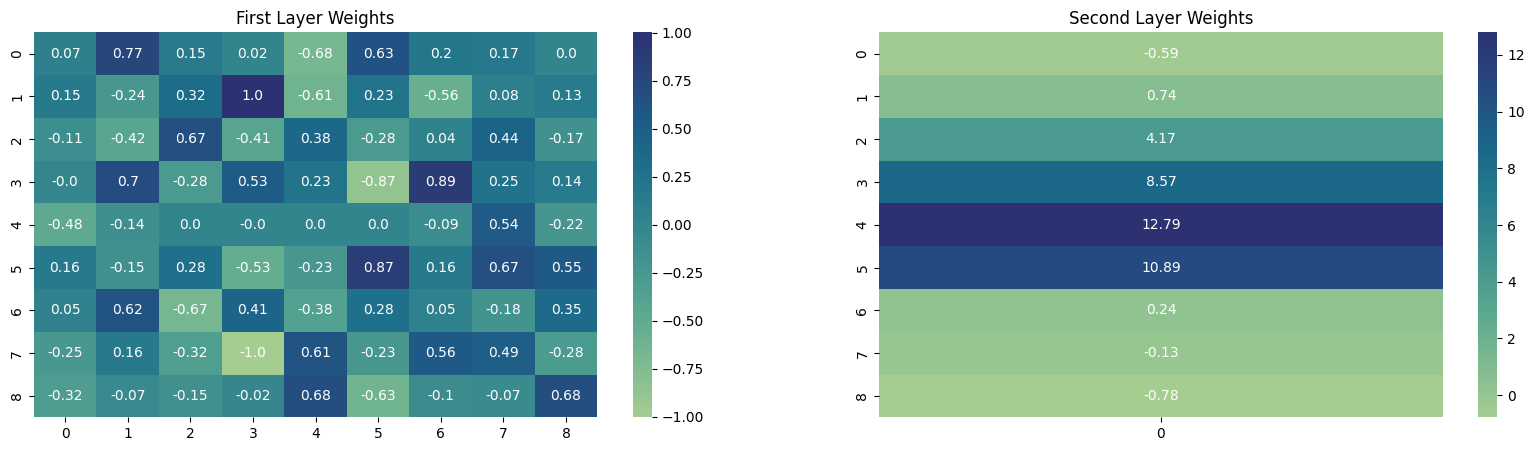

In [62]:
# visualize mlp
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.heatmap(mlp_encoded_with_ascii_shifted_to_zero.coefs_[0], ax=axes[0], cmap='crest')
sns.heatmap(mlp_encoded_with_ascii_shifted_to_zero.coefs_[1], ax=axes[1], cmap='crest')
# Add annotations
for i in range(9):
    for j in range(9):
        axes[0].text(j+0.5, i+0.5, round(mlp_encoded_with_ascii_shifted_to_zero.coefs_[0][i][j], 2), ha='center', va='center', color='white')

for i in range(9):
    for j in range(1):
        axes[1].text(j+0.5, i+0.5, round(mlp_encoded_with_ascii_shifted_to_zero.coefs_[1][i][j], 2), ha='center', va='center', color='white')
axes[0].set_title('First Layer Weights')
axes[1].set_title('Second Layer Weights')
plt.show()